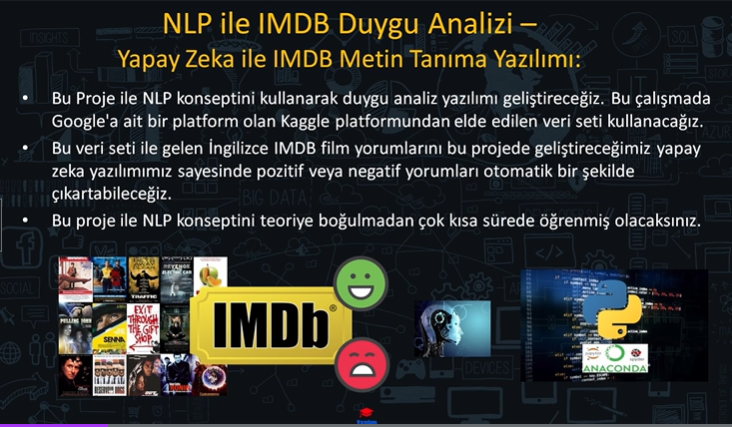

In [46]:
from IPython.display import Image
Image('1.png')

In [47]:
 import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from bs4 import BeautifulSoup
import re 
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords



In [48]:
df = pd.read_csv('NLPlabeledData.tsv', delimiter="\t",quoting=3)

In [49]:
df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [50]:
len(df)

25000

In [51]:
len(df["review"])

25000

In [52]:
## stopwords'ü temizlemek için nltk kütüphanesinden stopwrords kelime setini bilgisayarımıza indirmemiz grerekiyor
## Buişlemi nltk ile yapıyoruz
x='stopwords'
nltk.download(x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apoks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Veri Temizleme işlemi 

##### öncelikle BeautifulSoup modülünü kulanarak HTML taglerini review cümlelerinden sileceğiz


In [53]:
sample_review = df.review[0]
sample_review

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [54]:
#HTML verilerini temizlendikten sonra 
sample_review = BeautifulSoup(sample_review).get_text()
sample_review

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 2

In [55]:
# noktalama işaaretleri ve sayılardacn temizliyoruz -regex kullanarak

sample_review=re.sub("[^a-zA-Z]",' ',sample_review) ##bunun gibbi olmayyyanı al yerine  boşluk koy re.sub
sample_review

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [56]:
## küçük harfe dönüştürüyoruz, makine öğrenim algoritası büyük harfle başlayan elimeleri farklı 
## algılamaması için yapıyoruz bunu :

sample_review = sample_review.lower()
sample_review

' with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    m

In [57]:
# sttopwords (yaani the, is ,are ,gibi kelimeler bunları yapay zekanın kullanılmamasını istıyoruz )
# önce split ile kelimelere bölüyoruz ve listeye dönüştürüyoruz

sample_review = sample_review.split()

In [58]:
sample_review

['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with',
 'mj',
 'i',
 've',
 'started',
 'listening',
 'to',
 'his',
 'music',
 'watching',
 'the',
 'odd',
 'documentary',
 'here',
 'and',
 'there',
 'watched',
 'the',
 'wiz',
 'and',
 'watched',
 'moonwalker',
 'again',
 'maybe',
 'i',
 'just',
 'want',
 'to',
 'get',
 'a',
 'certain',
 'insight',
 'into',
 'this',
 'guy',
 'who',
 'i',
 'thought',
 'was',
 'really',
 'cool',
 'in',
 'the',
 'eighties',
 'just',
 'to',
 'maybe',
 'make',
 'up',
 'my',
 'mind',
 'whether',
 'he',
 'is',
 'guilty',
 'or',
 'innocent',
 'moonwalker',
 'is',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'which',
 'i',
 'remember',
 'going',
 'to',
 'see',
 'at',
 'the',
 'cinema',
 'when',
 'it',
 'was',
 'originally',
 'released',
 'some',
 'of',
 'it',
 'has',
 'subtle',
 'messages',
 'about',
 'mj',
 's',
 'feeling',
 'towards',
 'the',
 'press',
 'and',
 'also',
 'the',
 'obvious',
 'message',
 'of',
 'drugs',

In [59]:
len(sample_review)

437

In [60]:
# stopword işlemi 
swords = set(stopwords.words("english"))
sample_review = [w for w in sample_review if w not in swords]
sample_review

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'excluding',
 'smooth',
 'crim

In [61]:
len(sample_review)

219

In [62]:
# temizleme işlemini bir for döngüsü içinde yapacağız ilk önce bir fonksiyon oluşturuyoruz
def process (review):
    review = BeautifulSoup(review).get_text()
    review = re.sub("[^a-zA-Z]",' ',review)
    review = review.lower()
    review = review.split()
    #stopwords
    swords = set(stopwords.words("english"))
    review = [w for w in review if w not in swords]
    return(" ".join(review))

In [63]:
train_x_tum =[]
for r in range(len(df["review"])):
    if (r+1)% 1000 ==0:
        print("işlenen review =",r+1)   
    train_x_tum.append(process(df["review"][r]))

işlenen review = 1000
işlenen review = 2000
işlenen review = 3000
işlenen review = 4000
işlenen review = 5000
işlenen review = 6000
işlenen review = 7000
işlenen review = 8000
işlenen review = 9000
işlenen review = 10000
işlenen review = 11000
işlenen review = 12000
işlenen review = 13000
işlenen review = 14000
işlenen review = 15000
işlenen review = 16000
işlenen review = 17000
işlenen review = 18000
işlenen review = 19000
işlenen review = 20000
işlenen review = 21000
işlenen review = 22000
işlenen review = 23000
işlenen review = 24000
işlenen review = 25000


#### Train, test split

In [64]:
x = train_x_tum
y = np.array(df["sentiment"])

# train test split
train_x, test_x, y_train, y_test = train_test_split(x,y, test_size = 0.1)

#### Bag of Words

Verilerimizi temizledik ancakk yapay zekanın çalışabilmesi için bu metin tabanlı veerileri sayılara ve bag of words denilen matrise çevirmek gerekiyor. işte bu amaçla sklearn içinde bulunan CountVectorizer aracını kullanıyoruz

In [65]:
# sklearn içinde bulunan countvectorizer fonksiyonunu kullanarak max 5000 kelimelik bag of words oluşturuyoruz...
vectorizer = CountVectorizer( max_features = 5000 )

# train verilerimizi feature vektöre matrisine çeviriyoruz
train_x = vectorizer.fit_transform(train_x)



In [66]:
train_x

<20000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1582365 stored elements in Compressed Sparse Row format>

In [67]:
train_x = train_x.toarray()
train_y = y_train

In [68]:
train_x.shape, train_y.shape

((20000, 5000), (20000,))

In [69]:
train_y

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [70]:
### RANDOM FOREST MODELİ OLUŞTURMA
model = RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

####  Şimdi  Sıra Test Datamızda

In [71]:
test_xx =vectorizer.transform(test_x)

In [72]:
test_xx

<5000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 392353 stored elements in Compressed Sparse Row format>

In [73]:
test_xx = test_xx.toarray()

In [74]:
test_xx.shape

(5000, 5000)

#### PREDİCTİON

In [77]:
test_predict = model.predict(test_xx)
dogruluk = roc_auc_score(y_test, test_predict)

In [78]:
print("Doğruluk Oranı : %",dogruluk*100)

Doğruluk Oranı : % 83.15072658600602
